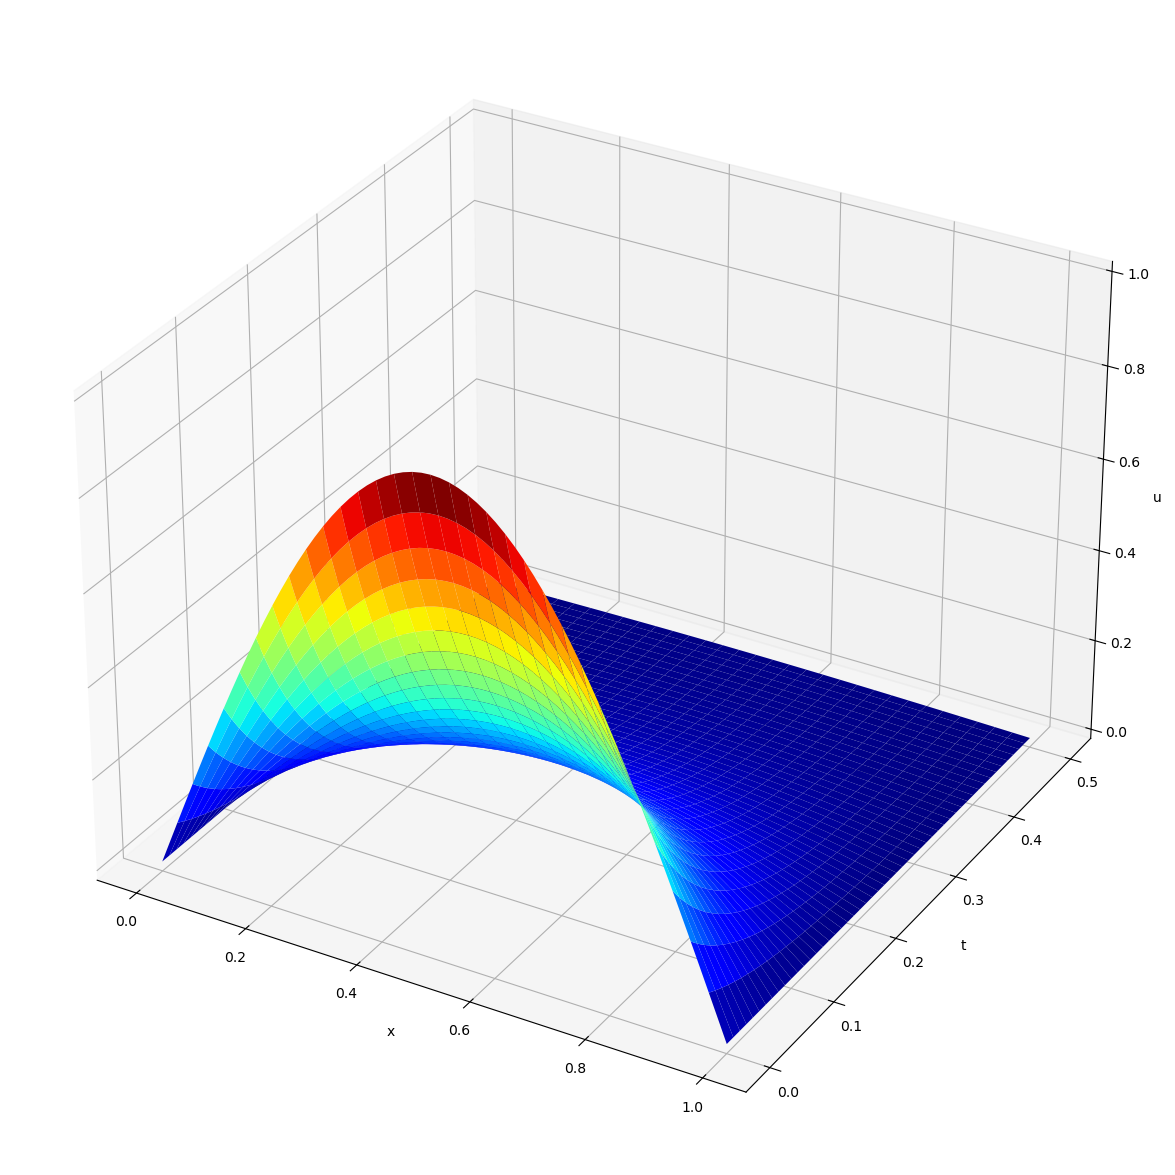

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#u(t,x)とする

div_num_x = 64  # 空間の分割数
h=1/div_num_x
dt=0.5*(h**2)
div_num_t=int(0.5/dt)


u = np.zeros((div_num_t + 1, div_num_x + 1)) #配列uの初期化　数値解が入る

# dt = 0.5 / div_num_t
# h = 1 / div_num_x

u[0] = [np.sin(np.pi * i * h) for i in range(div_num_x + 1)]

for i in range(div_num_t):
    for j in range(1, div_num_x):
        u[i + 1, j] = 0.5 * (u[i, j - 1] + u[i, j + 1])

t = np.linspace(0, 0.5, div_num_t + 1)
x = np.linspace(0, 1, div_num_x + 1)
T, X = np.meshgrid(x, t)

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": "3d"})
ax.plot_surface(T, X, u, cmap="jet")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
plt.show()

以下、numbaで書き直し

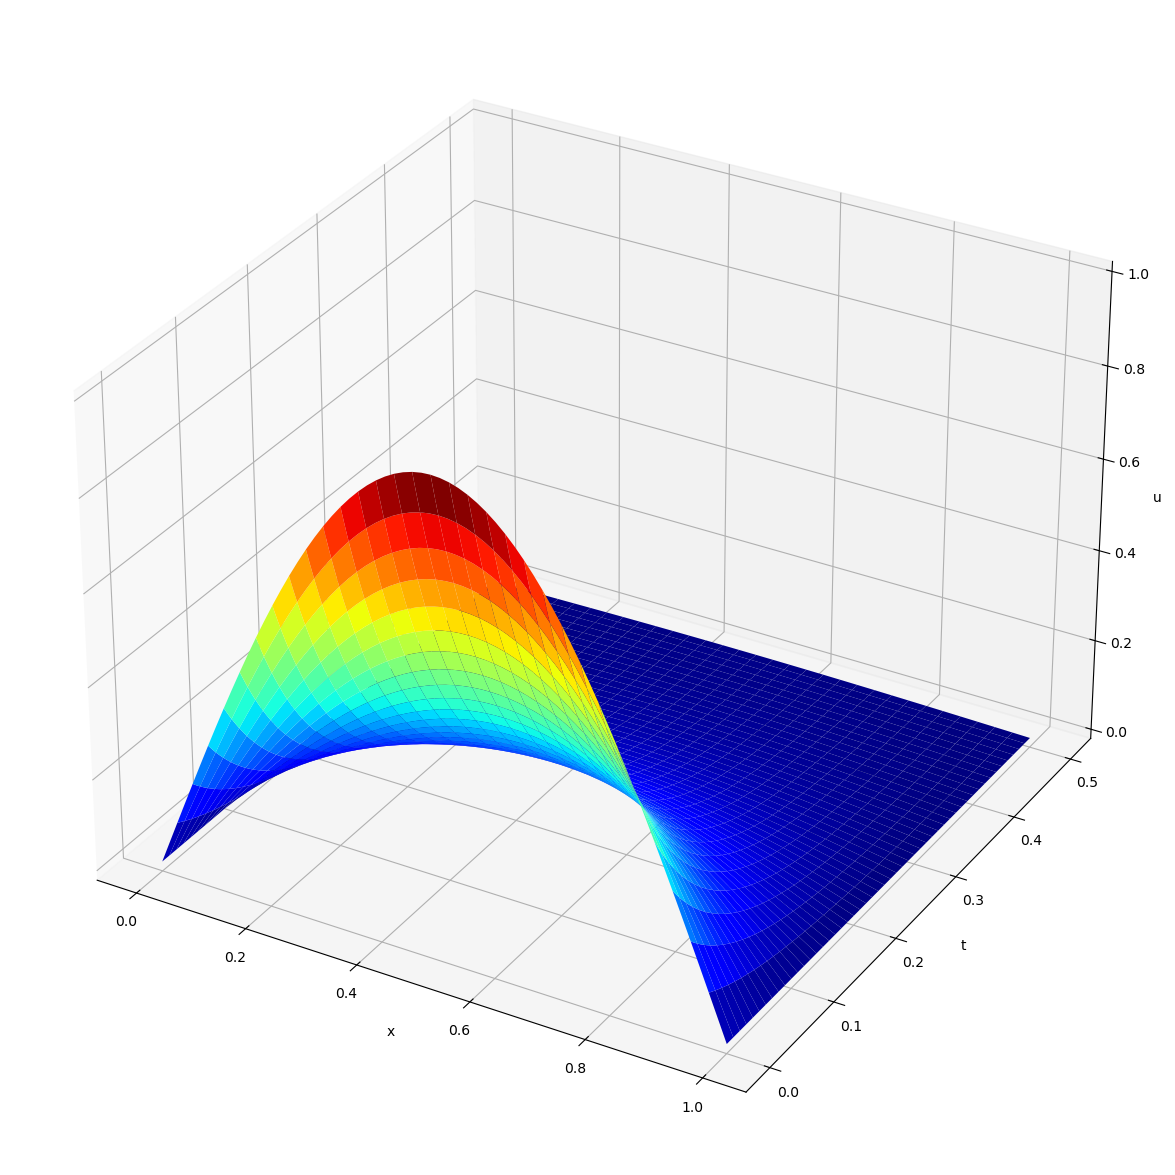

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D
from numba import njit

# u(t,x)とする

div_num_x = 64  # 空間の分割数


@njit("Tuple((f8[:,:],f8[:,:]))(f8[:],f8[:])")
def meshgrid(x, y):
    xx = np.empty((y.size, x.size), dtype=np.float64)
    yy = np.empty((y.size, x.size), dtype=np.float64)
    for i in range(y.size):
        for j in range(x.size):
            xx[i, j] = x[j]
            yy[i, j] = y[i]
    return xx, yy



@njit()
def culc_oed(div_num_x):
    h = 1 / div_num_x
    dt = 0.5 * (h**2)
    div_num_t = int(0.5 / dt)

    u = np.zeros((div_num_t + 1, div_num_x + 1))  # 配列uの初期化　数値解が入る

    # dt = 0.5 / div_num_t
    # h = 1 / div_num_x

    u[0] = [np.sin(np.pi * i * h) for i in range(div_num_x + 1)]

    for i in range(div_num_t):
        for j in range(1, div_num_x):
            u[i + 1, j] = 0.5 * (u[i, j - 1] + u[i, j + 1])

    return u, div_num_t
u,div_num_t=culc_oed(div_num_x)
t = np.linspace(0, 0.5, div_num_t + 1)
x = np.linspace(0, 1, div_num_x + 1)
T,X= meshgrid(x, t)

fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={"projection": "3d"})
ax.plot_surface(T, X, u, cmap="jet")
ax.grid()
ax.set_xlabel("x")
ax.set_ylabel("t")
ax.set_zlabel("u")
plt.show()